### **HOMEWORK 3**  <h3>

Inicialmente temos que ler o DataSet. Fizemos um split com 80% para treino e 20% para teste.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error 
import numpy as np
import matplotlib.pyplot as plt

# Ler o ficheiro
data = pd.read_csv("winequality-red.csv", delimiter=';')

X = data.drop('quality', axis=1)
y = data['quality']

# Fazer um train/test split (80 treino e 20 teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Exercício 1**  <h3>

Para cada random state entre 1 e 10, inicializámos um regressor MLP, treinámos o modelo e calculámos os resíduos.

In [12]:
#lista residuos
resid = []

# iteração para cada random state
for i in range(1, 11):
    # Initialize the MLP regressor with random state
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='relu',
                   early_stopping=True,
                   validation_fraction=0.2,
                   random_state=i)
    
   
    # treinar o modelo
    mlp.fit(X_train, y_train)
    
    # obter y previsto
    y_pred = mlp.predict(X_test)

    # obter os resíduos
    residuos = y_test - y_pred

    # Calcular o módulo dos resíduos
    abs_residuos = abs(residuos)

    resid.append(abs_residuos)

/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/sit

Fizemos a média dos resíduos para cada random state e obtivemos o histograma da distribuição desta.

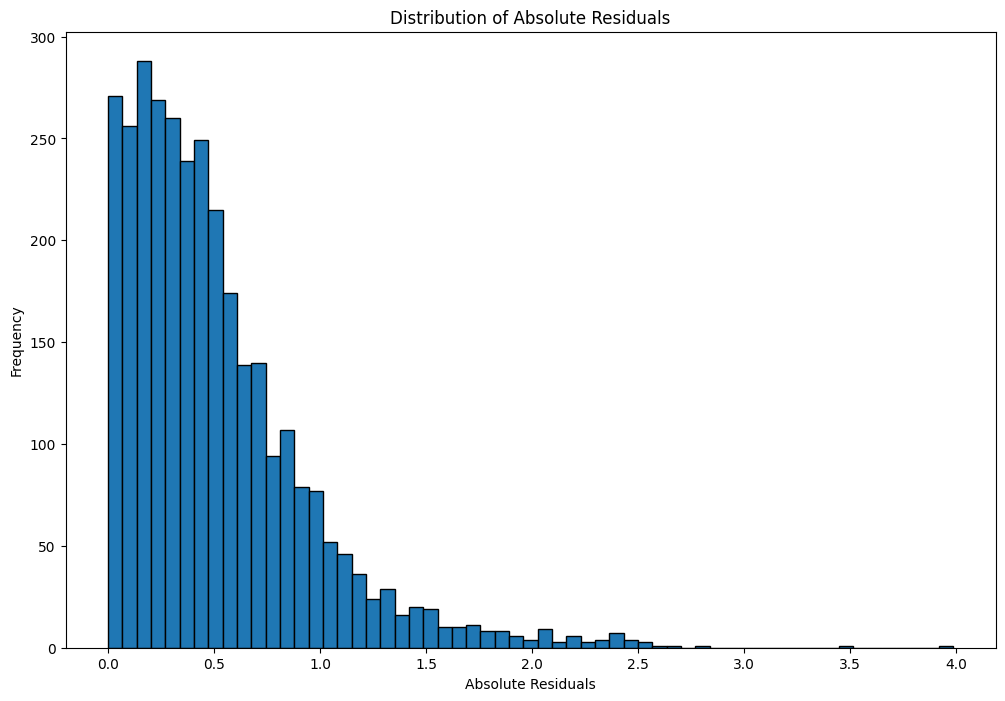

In [13]:
# por os resíduos numa lista
resid = np.concatenate(resid)

# fazer o histograma
plt.figure(figsize=(12, 8))
plt.hist(resid, bins='auto', edgecolor='k')
plt.title('Distribution of Absolute Residuals')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.show()

### **Exercício 2**  <h3>

Calculámos o MAE utilizando os valores de y previsto originais e os valores de y previsto arredondados. 

In [14]:
# aproximamos os valores previstos para os valores inteiros mais próximos
rounded_predictions = np.round(y_pred)

# obter máximo e mínimo do target
min_target = np.min(y_train)
max_target = np.max(y_train)

# garantir que os valores previstos estão dentro do intervalo do target
bounded_predictions = np.clip(rounded_predictions, min_target, max_target)

# obter o MAE com os valores originais
mae_original = mean_absolute_error(y_test, y_pred)

# obtet o MAE com os valores arredondados
mae_rounded = mean_absolute_error(y_test, bounded_predictions)

print("MAE with Original Predictions:", mae_original)
print("MAE with Rounded and Bounded Predictions:", mae_rounded)

MAE with Original Predictions: 0.4942652184506272
MAE with Rounded and Bounded Predictions: 0.428125


Como podemos verificar, o erro é menor quando arredondamos os valores de y previsto. Deste modo, neste caso arredondar os valores é uma vantagem.


### **Exercício 3**  <h3>

Inicializámos o regressor MLP com 4 números diferentes de iterações máximas. Para cada um desses valores, calculámos o RMSE, fazendo a média do RMSE para cada random state.

In [15]:
# nº de iterações
iterations = [20, 50, 100, 200]

# lista para guardar os RMSE de cada iteração
rmse_values = []

# iteração pela lista de cada nº de iterações máximas
for max_iter in iterations:
    rmse_lista = []
    for i in range(1, 11):
        # Inicializar o MLP regressor com os parâmetros pedidos
        mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10),
                        activation='relu',
                        max_iter=max_iter,
                        random_state=i)

        # treinar o modelo
        mlp2.fit(X_train, y_train)

        # obter y previsto
        y_pred2 = mlp2.predict(X_test)

        # calcular rmse
        rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
        rmse_lista.append(rmse)
    valor_rmse = sum(rmse_lista) / len(rmse_lista)
    rmse_values.append(valor_rmse)

# juntar à lista o RMSE com early stopping
rmse_es = np.sqrt(mean_squared_error(y_test, y_pred))


for rmse in rmse_values:
        print("RMSE for {} iterations: {}".format(iterations[rmse_values.index(rmse)], rmse))
print("RMSE with Early Stopping:", rmse_es)

/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sofiatete/.local/lib/python3.8/site-pa

RMSE for 20 iterations: 1.403978950992544
RMSE for 50 iterations: 0.7996073631460567
RMSE for 100 iterations: 0.6940361469112146
RMSE for 200 iterations: 0.6554543932216473
RMSE with Early Stopping: 0.6529926888895303


/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Exercício 4**  <h3>

Para fazer a análise dos valores obtidos no exercício anterior, fizemos um gráfico com os valores de RMSE para cada número de iterações máximas, assim como o valor do RMSE obtido com early stopping. 

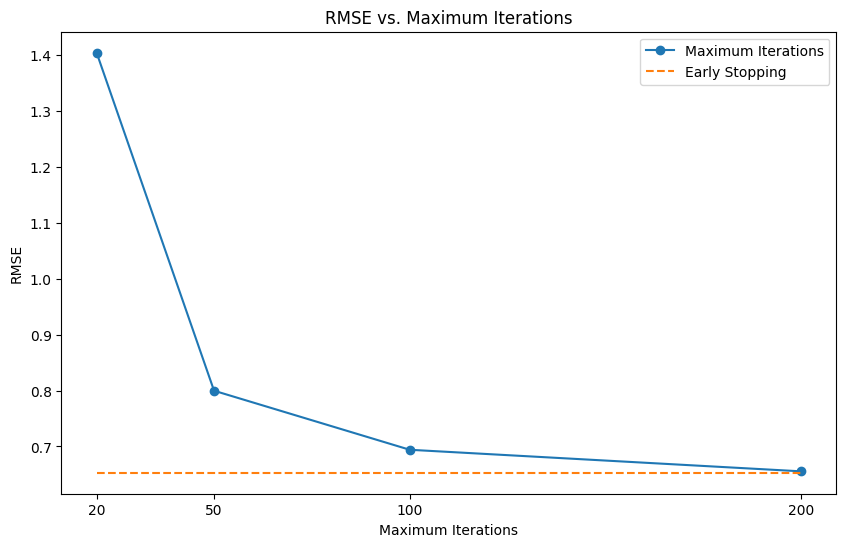

In [16]:
# Array de valores constantes de y
y = [rmse_es for i in range(len(iterations))]

# nº iterações vs early stopping
plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_values, marker='o', label='Maximum Iterations')
plt.plot(iterations, y, linestyle='--', label='Early Stopping')
plt.xlabel('Maximum Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs. Maximum Iterations')
plt.xticks(iterations)
plt.legend()
plt.show()